In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [37]:
datasets = {1: 'data/IT2/RegressionContrastive', 
            2: 'data/IT2/Contrastive', 
            #3: 'data/IT2/ContinuedContrastive', 
            4: 'data/IT2/OnlyPositiveContrastive',
            5: 'data/IT2/RegContrastiveContinued',
            6: 'data/IT2/CDFTobit/epoch_180',
            7: 'data/IT3/LogTobitAndCDF',
            8: 'data/IT3/LogTobitAndCDF1',
            9: 'data/IT3/RegressionNegNum1',
            10: 'data/IT2/ContrastiveVariantMSE',
            12: 'data/IT4/MSEAndContrastive/Test',
            13: 'data/IT4/Contrastive/Test',
            14: 'data/IT4/MSEContrativeCombined/Test'}

no = 13
gps = np.genfromtxt(f'{datasets[no]}/gps.csv', delimiter=',')
emb = np.genfromtxt(f'{datasets[no]}/embedding.csv', delimiter=',')
emb = 1-emb

# Correlation

MSE: 0.001534532021183418
Gradient: [0.00143682]


(0.0, 1.0)

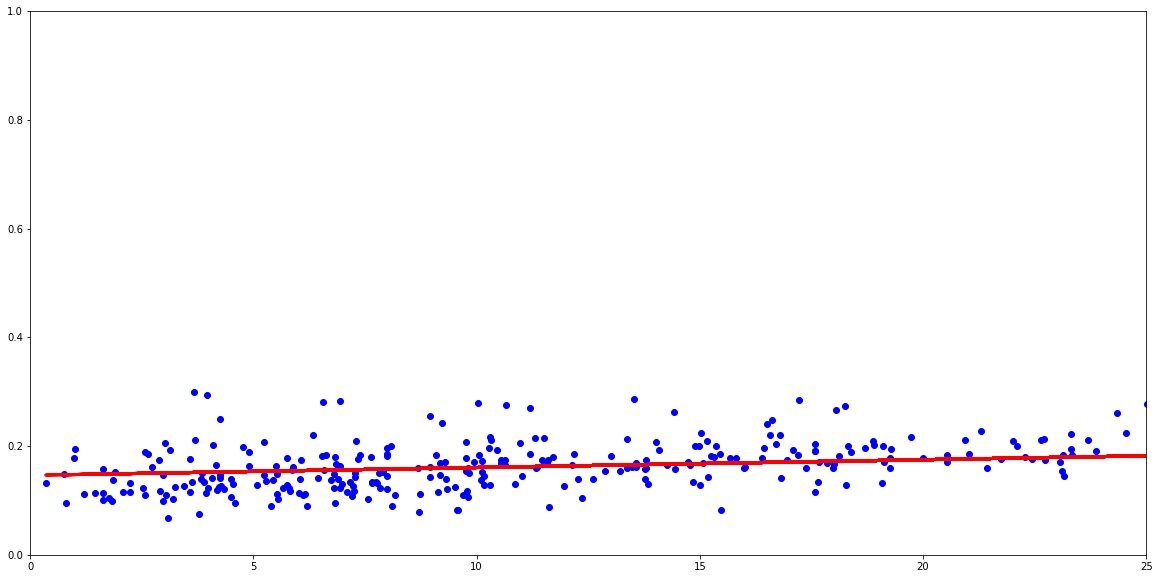

In [39]:
positive_emb = emb[gps != 0].reshape(-1, 1)
positive_gps = gps[gps != 0].reshape(-1, 1)

reg = LinearRegression().fit(positive_gps, positive_emb)
mse = mean_squared_error(positive_emb, reg.predict(positive_gps))
print(f'MSE: {mse}')
print(f'Gradient: {reg.coef_[0]}')

predicted = reg.predict(positive_gps)


#Plot
fig, axs = plt.subplots(1, 1, figsize=(20,10))
axs.scatter(positive_gps, positive_emb, color='b')
axs.plot(positive_gps, predicted, color='red', linewidth=3)
axs.set_xlim([0, 25])
axs.set_ylim([0.0, 1.0])

# Kendall's Tau

In [7]:
def kendalltau(ranking_a, ranking_b):
    return stats.kendalltau(np.argsort(ranking_a), np.argsort(ranking_b))

In [11]:
N = len(gps)
scores = np.zeros(N)
for i in range(N):
    c, p = kendalltau(gps[i], emb[i])
    scores[i] = c
print(np.mean(scores), np.max(scores))

0.09120224325271643 0.911111111111111
